In [1]:
# Mustafa Arsiwala
# ma59448
# Reinforcement Learning
# PA1

In [2]:
NUM_STEPS, NUM_RUNS = 10000, 300
EPSILON, WEIGHTED_ALPHA = 0.1, 0.1

In [3]:
import numpy as np
import random
import matplotlib.pyplot as plt
import matplotlib as mpl

In [4]:
def sample_avg_bandit(estimate, reward_val, action_count):
    estimate += 1/action_count * (reward_val - estimate)
    return estimate
    

In [5]:
# Function for weighted average bandit's reward estimation.
def weighted_bandit(estimate, reward_val):
    estimate += WEIGHTED_ALPHA * (reward_val - estimate)
    return estimate


In [6]:
def getActionNum(method_type):
    action_num = -1
    isExploring = True if random.random() >= (1 - EPSILON) else False
    if isExploring:
        action_num = random.randint(0, len(q_vals) - 1)
    else:
        if method_type == 'sample_avg':
            action_num = savg_est.index(max(savg_est))
        else:
            action_num = weighted_est.index(max(weighted_est))
    return action_num


In [7]:
# Initialize statistics tracking and loop for required number of runs.
savg_ratio, weighted_ratio = np.zeros(NUM_STEPS), np.zeros(NUM_STEPS)
savg_avg, weighted_avg = np.zeros((NUM_STEPS, NUM_RUNS)), np.zeros((NUM_STEPS, NUM_RUNS))

for i in range(NUM_RUNS):
    # Step 1: initialize true values and estimates.
    q_vals = [0] * 10
    savg_est, savg_actions = [0] * 10, [0] * 10
    weighted_est = [0] * 10

    # Each run should loop for required amount of steps.
    for j in range(NUM_STEPS):

        # First update the q* values.
        for k in range(len(q_vals)):
            q_vals[k] += np.random.normal(0, 0.01)


        # Perform sample-avg bandit method.
        # Step 2: Pick an action, using the epsilon-greedy method.
        action_num = getActionNum('sample_avg')

        # NOTE: Track if action_num is equal to q_vals(max) here.
        optimal_action = q_vals.index(max(q_vals))
        if optimal_action == action_num:
            savg_ratio[j] += 1

        # Step 3: Once action is picked, get reward value from Gaussian distribution, and save it for later averaging.
        estimate = savg_est[action_num]
        reward = np.random.normal(q_vals[action_num], 1)
        savg_avg[j, i] = reward

        # Step 4: Increment action count and update value estimate.
        savg_actions[action_num] += 1
        savg_est[action_num] = sample_avg_bandit(estimate, reward, savg_actions[action_num])



        # Perform weighted-avg bandit method.
        # Step 2: Pick an action, using the epsilon-greedy method.
        action_num = getActionNum('weighted')

        # NOTE: Track if action_num is equal to q_vals(max) here.
        if optimal_action == action_num:
            weighted_ratio[j] += 1


        # Step 3/4: Once action is picked, get reward value from Gaussian distribution.
        estimate = weighted_est[action_num]
        reward = np.random.normal(q_vals[action_num], 1)
        weighted_avg[j, i] = reward

        # Step 4: Update value estimate.
        weighted_est[action_num] = weighted_bandit(estimate, reward)


In [8]:
savg_ratio /= NUM_RUNS
weighted_ratio /= NUM_RUNS

In [9]:
weighted_avg = np.mean(weighted_avg, axis=1)

In [10]:
savg_avg = np.mean(savg_avg, axis = 1)

In [11]:
final = np.array([savg_avg, savg_ratio, weighted_avg, weighted_ratio])

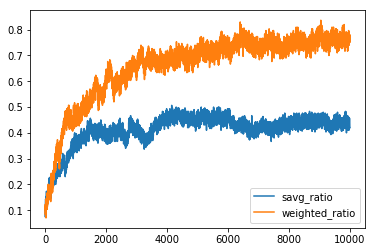

In [13]:
plt.plot(savg_ratio, label="savg_ratio")
plt.plot(weighted_ratio, label="weighted_ratio")
plt.legend()

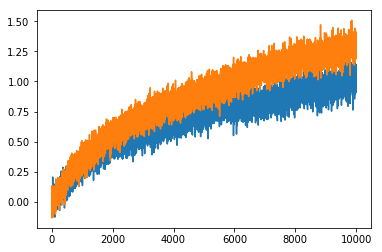

In [14]:
plt.plot(savg_avg, label="savg_avg")
plt.plot(weighted_avg, label="weighted_avg")

In [12]:
np.savetxt('result.out', final)